#Today's problem involves analyzing car data. This dataset comprises 1728 rows and 6 different attributes: buying price, price of maintenance, number of doors, capacity in terms of persons to carry, the relative size of the luggage boot, and the estimated safety value of each car.
#The Problem: You are tasked with constructing and evaluating a decision tree classifier on this dataset. Utilize and compare different types of split criteria (entropy, Gini index, loss). The decision tree will classify the type of car into one of the following categories: 1) unacceptable, 2) acceptable, 3) good, or 4) very good.

#In addition to developing an ML model, you also need to visualize a trees based on your developed models. The tree can be visualized using graphviz library.

#Note - This time, the data is split into several CSV files and stored in a zipped folder. You need to merge or concatenate the data after reading from multiple files.
#Resource for combining dataframes:
https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.concat.html

#Resources for drawing a tree using Graphviz:

https://scikit-learn.org/stable/modules/generated/sklearn.tree.export_graphviz.html

https://canvas.anglia.ac.uk/files/4155049/download?download_frd=1



In [ ]:
################################################################################
#
#
# Your code to develop a decision tree classifier.
# Check the accuracy, performance metrices, and confusion metrics.
# Draw the decision tree using Graphviz.
# You can split your code into different cells according to your own choice
#
#
################################################################################


In [1]:
import numpy as np
import pandas as pd
from pandas import DataFrame, Series
from IPython.display import Image 
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
try:
    from StringIO import StringIO
except ImportError:
    from io import StringIO
import pydotplus
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
pip install pydotplus

Note: you may need to restart the kernel to use updated packages.


In [3]:
df1 = pd.read_csv('car_evaluation_0.csv')
df1.tail()

,buyPrice,maintCost,noDoors,noPersons,bootLuggage,safety,decision
427,vhigh,low,5more,more,med,high,acc
428,vhigh,low,5more,more,big,low,unacc
429,vhigh,low,5more,more,big,med,acc
430,vhigh,low,5more,more,big,high,acc
431,high,vhigh,2,2,small,low,unacc


In [4]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 432 entries, 0 to 431
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   buyPrice     432 non-null    object
 1   maintCost    432 non-null    object
 2   noDoors      432 non-null    object
 3   noPersons    432 non-null    object
 4   bootLuggage  432 non-null    object
 5   safety       432 non-null    object
 6   decision     432 non-null    object
dtypes: object(7)
memory usage: 23.8+ KB


In [5]:
df2 = pd.read_csv('car_evaluation_1.csv')
df2.tail()

,buyPrice,maintCost,noDoors,noPersons,bootLuggage,safety,decision
427,high,low,5more,more,med,high,acc
428,high,low,5more,more,big,low,unacc
429,high,low,5more,more,big,med,acc
430,high,low,5more,more,big,high,acc
431,med,vhigh,2,2,small,low,unacc


In [6]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 432 entries, 0 to 431
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   buyPrice     432 non-null    object
 1   maintCost    432 non-null    object
 2   noDoors      432 non-null    object
 3   noPersons    432 non-null    object
 4   bootLuggage  432 non-null    object
 5   safety       432 non-null    object
 6   decision     432 non-null    object
dtypes: object(7)
memory usage: 23.8+ KB


# Lab Logbook requirements. Answer the following questions and put in your lab logbook (Do not use more than 2 sentences for each question):


1.   What is the decision criterion at each node of the decision tree?
2.   How is entropy/gini index/loss change at each node?
3.   Is entropy decreasing or increasing in as we move down in tree?
4.   How many samples are left at each node? Can you see any pattern?
5.   What information is contained at leaf node?



In [7]:
df3 = pd.read_csv('car_evaluation_2.csv')
df3.tail()

,buyPrice,maintCost,noDoors,noPersons,bootLuggage,safety,decision
427,med,low,5more,more,med,high,vgood
428,med,low,5more,more,big,low,unacc
429,med,low,5more,more,big,med,good
430,med,low,5more,more,big,high,vgood
431,low,vhigh,2,2,small,low,unacc


In [8]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 432 entries, 0 to 431
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   buyPrice     432 non-null    object
 1   maintCost    432 non-null    object
 2   noDoors      432 non-null    object
 3   noPersons    432 non-null    object
 4   bootLuggage  432 non-null    object
 5   safety       432 non-null    object
 6   decision     432 non-null    object
dtypes: object(7)
memory usage: 23.8+ KB


In [9]:
df4 = pd.read_csv('car_evaluation_3.csv')
df4.tail()

,buyPrice,maintCost,noDoors,noPersons,bootLuggage,safety,decision
426,low,low,5more,more,med,med,good
427,low,low,5more,more,med,high,vgood
428,low,low,5more,more,big,low,unacc
429,low,low,5more,more,big,med,good
430,low,low,5more,more,big,high,vgood


In [10]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 431 entries, 0 to 430
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   buyPrice     431 non-null    object
 1   maintCost    431 non-null    object
 2   noDoors      431 non-null    object
 3   noPersons    431 non-null    object
 4   bootLuggage  431 non-null    object
 5   safety       431 non-null    object
 6   decision     431 non-null    object
dtypes: object(7)
memory usage: 23.7+ KB


In [11]:
df = pd.concat([df1, df2, df3, df4], ignore_index=0)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1727 entries, 0 to 430
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   buyPrice     1727 non-null   object
 1   maintCost    1727 non-null   object
 2   noDoors      1727 non-null   object
 3   noPersons    1727 non-null   object
 4   bootLuggage  1727 non-null   object
 5   safety       1727 non-null   object
 6   decision     1727 non-null   object
dtypes: object(7)
memory usage: 107.9+ KB


In [13]:
df['buyPrice'].value_counts()

high     432
med      432
low      432
vhigh    431
Name: buyPrice, dtype: int64

In [14]:
df['maintCost'].value_counts()

high     432
med      432
low      432
vhigh    431
Name: maintCost, dtype: int64

In [15]:
df['noDoors'].value_counts()

3        432
4        432
5more    432
2        431
Name: noDoors, dtype: int64

In [16]:
df['noPersons'].value_counts()

4       576
more    576
2       575
Name: noPersons, dtype: int64

In [17]:
df['bootLuggage'].value_counts()

med      576
big      576
small    575
Name: bootLuggage, dtype: int64

In [18]:
df['safety'].value_counts()

med     576
high    576
low     575
Name: safety, dtype: int64

In [19]:
df['decision'].value_counts()

unacc    1209
acc       384
good       69
vgood      65
Name: decision, dtype: int64

In [20]:
df.replace(to_replace=["low","med","high","vhigh"], value = [1, 2, 3, 4], inplace=True)

In [21]:
df

,buyPrice,maintCost,noDoors,noPersons,bootLuggage,safety,decision
0,4,4,2,2,small,2,unacc
1,4,4,2,2,small,3,unacc
2,4,4,2,2,2,1,unacc
3,4,4,2,2,2,2,unacc
4,4,4,2,2,2,3,unacc
...,...,...,...,...,...,...,...
426,1,1,5more,more,2,2,good
427,1,1,5more,more,2,3,vgood
428,1,1,5more,more,big,1,unacc
429,1,1,5more,more,big,2,good


In [22]:
df.replace(to_replace=["small", "big"], value=[1,3], inplace=True)

In [23]:
df

,buyPrice,maintCost,noDoors,noPersons,bootLuggage,safety,decision
0,4,4,2,2,1,2,unacc
1,4,4,2,2,1,3,unacc
2,4,4,2,2,2,1,unacc
3,4,4,2,2,2,2,unacc
4,4,4,2,2,2,3,unacc
...,...,...,...,...,...,...,...
426,1,1,5more,more,2,2,good
427,1,1,5more,more,2,3,vgood
428,1,1,5more,more,3,1,unacc
429,1,1,5more,more,3,2,good


In [24]:
df.replace(to_replace=["2", "3", "4", "5more", "more"], value=[2, 3, 4, 5, 5], inplace=True)

In [25]:
df

,buyPrice,maintCost,noDoors,noPersons,bootLuggage,safety,decision
0,4,4,2,2,1,2,unacc
1,4,4,2,2,1,3,unacc
2,4,4,2,2,2,1,unacc
3,4,4,2,2,2,2,unacc
4,4,4,2,2,2,3,unacc
...,...,...,...,...,...,...,...
426,1,1,5,5,2,2,good
427,1,1,5,5,2,3,vgood
428,1,1,5,5,3,1,unacc
429,1,1,5,5,3,2,good


In [26]:
df.replace(to_replace=["unacc", "acc", "good", "vgood"], value=[1, 2, 3, 4], inplace=True)

In [27]:
df

,buyPrice,maintCost,noDoors,noPersons,bootLuggage,safety,decision
0,4,4,2,2,1,2,1
1,4,4,2,2,1,3,1
2,4,4,2,2,2,1,1
3,4,4,2,2,2,2,1
4,4,4,2,2,2,3,1
...,...,...,...,...,...,...,...
426,1,1,5,5,2,2,3
427,1,1,5,5,2,3,4
428,1,1,5,5,3,1,1
429,1,1,5,5,3,2,3


In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1727 entries, 0 to 430
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   buyPrice     1727 non-null   int64
 1   maintCost    1727 non-null   int64
 2   noDoors      1727 non-null   int64
 3   noPersons    1727 non-null   int64
 4   bootLuggage  1727 non-null   int64
 5   safety       1727 non-null   int64
 6   decision     1727 non-null   int64
dtypes: int64(7)
memory usage: 107.9 KB


In [29]:
columns=['buyPrice','maintCost','noDoors','noPersons','bootLuggage','safety','decision']

for column in columns:
    df[column]=pd.to_numeric(df[column],downcast='integer')

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1727 entries, 0 to 430
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   buyPrice     1727 non-null   int8 
 1   maintCost    1727 non-null   int8 
 2   noDoors      1727 non-null   int8 
 3   noPersons    1727 non-null   int8 
 4   bootLuggage  1727 non-null   int8 
 5   safety       1727 non-null   int8 
 6   decision     1727 non-null   int8 
dtypes: int8(7)
memory usage: 25.3 KB


In [31]:
X = df.drop('decision',axis=1).values

In [32]:
y = df['decision'].values

In [33]:
print(X)

[[4 4 2 2 1 2]
 [4 4 2 2 1 3]
 [4 4 2 2 2 1]
 ...
 [1 1 5 5 3 1]
 [1 1 5 5 3 2]
 [1 1 5 5 3 3]]


In [34]:
print(y)

[1 1 1 ... 1 3 4]


In [35]:
X_train, X_test, y_train, y_test = train_test_split (X, y, test_size = 0.1, random_state = 27)

In [36]:
print (X_train.shape)
print (X_test.shape)

print (y_train.shape)
print (y_test.shape)

(1554, 6)
(173, 6)
(1554,)
(173,)


In [37]:
clf_entropy = DecisionTreeClassifier(criterion='entropy')

In [38]:
clf_entropy=clf_entropy.fit(X_train, y_train)

In [39]:
feature_name = df.columns[:-1]
target_name = df.columns[-1]

print(feature_name, '\n')
print(target_name)

Index(['buyPrice', 'maintCost', 'noDoors', 'noPersons', 'bootLuggage',
       'safety'],
      dtype='object') 

decision


In [40]:
tree.export_graphviz(clf_entropy, out_file='tree_grid_clf_entropy.dot', feature_names=feature_name, filled=True)

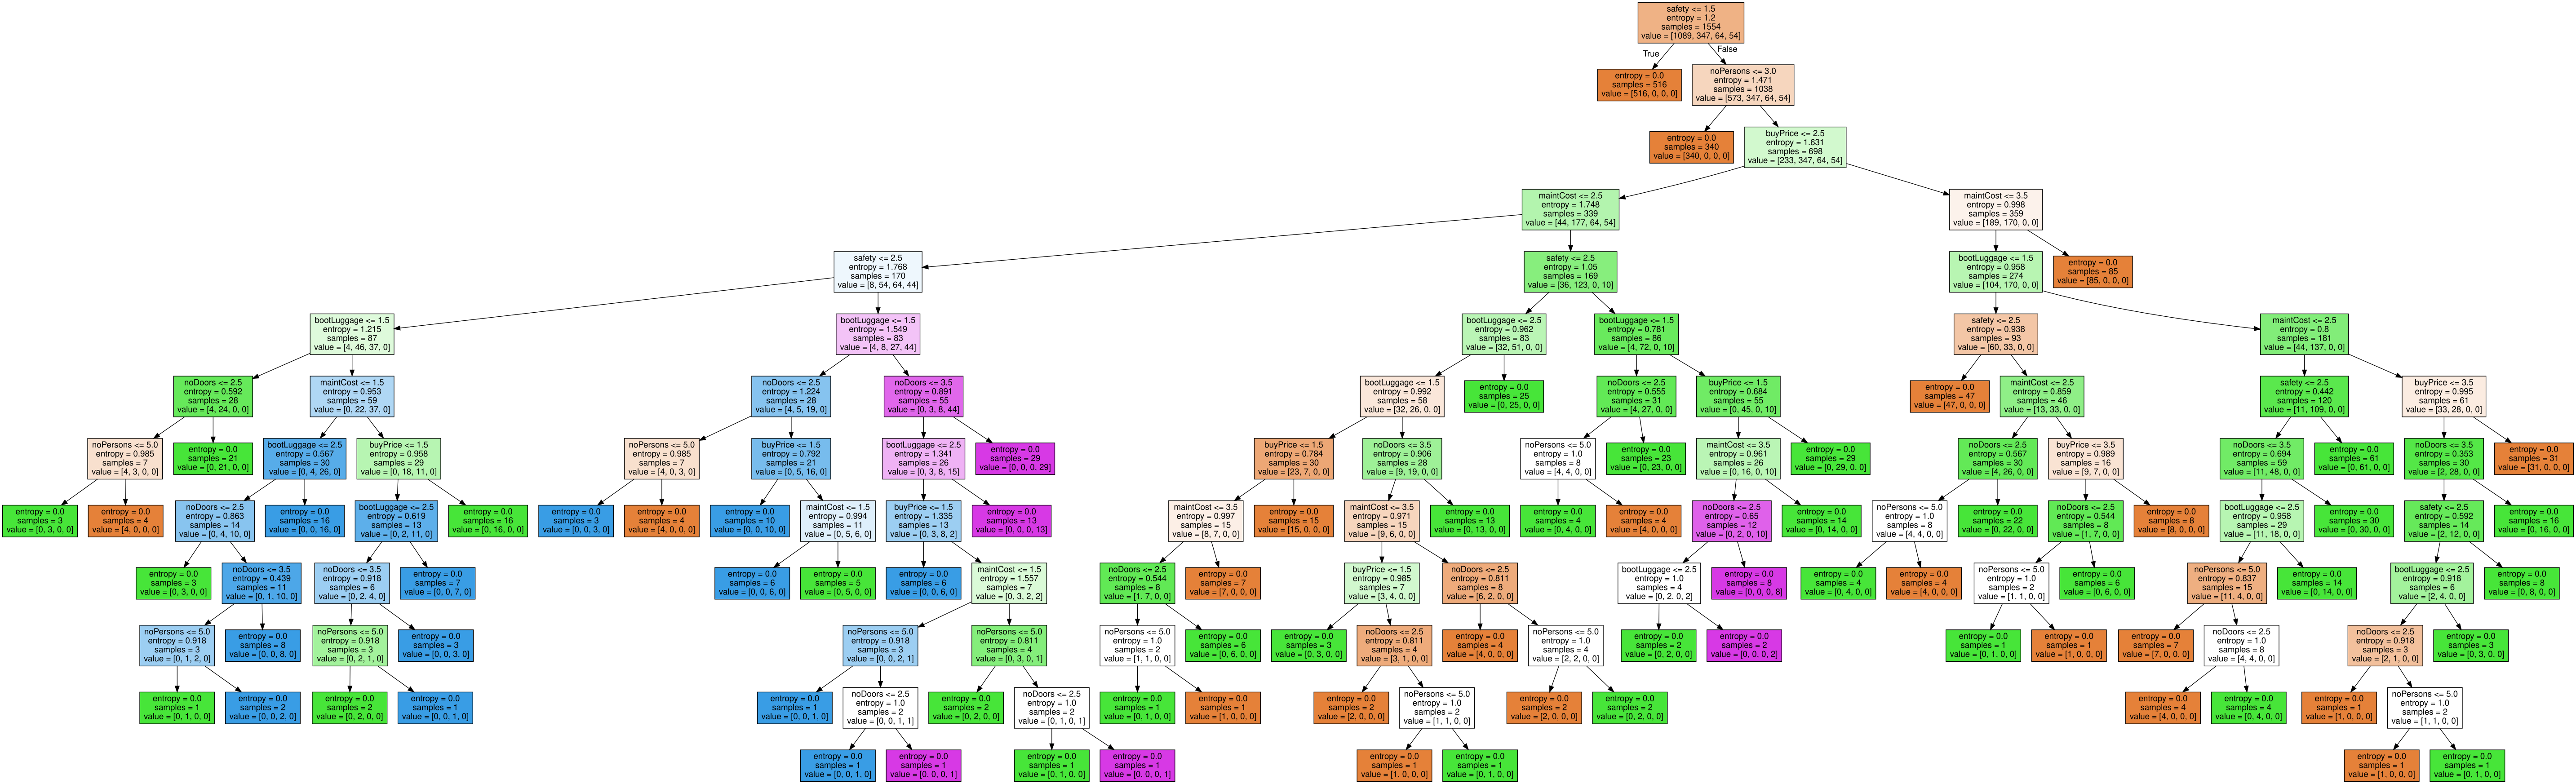

In [41]:
display(Image('tree_grid_clf_entropy.png', unconfined=True))

In [42]:
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [43]:
# Create an empty list accuracy
accuracy = []

# Create an empty list train_scores_models
test_scores_DT_models = []

# Create an empty list of models
DT_models = []

In [44]:
y_pred = clf_entropy.predict(X_test)

test_score = accuracy_score(y_test, y_pred)
    
accuracy.append(test_score)
    

print("Accuracy test set: ", accuracy_score(y_test, y_pred))

print("Precision test set: ", precision_score(y_test, y_pred, average = 'weighted' )) 
print("Recall test set: ", recall_score(y_test, y_pred, average = 'weighted' ))
print("F-score test set: ", f1_score(y_test, y_pred, average = 'weighted' ))



Accuracy test set:  0.9826589595375722
Precision test set:  0.9831727681438664
Recall test set:  0.9826589595375722
F-score test set:  0.9827413450662201


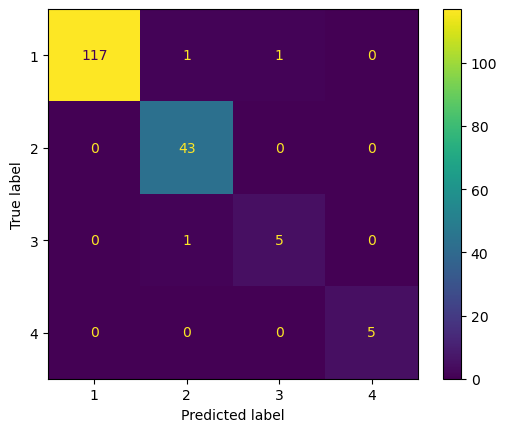

In [45]:

cm = confusion_matrix(y_test, y_pred) 
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = clf_entropy.classes_)
disp.plot()
plt.show()

In [46]:
# add accuracy value for DT based on Entropy

test_scores_DT_models.append(accuracy[0])
test_scores_DT_models


[0.9826589595375722]

In [47]:
# add model to the list
DT_models.append('DT_Entropy')
DT_models

['DT_Entropy']

In [48]:
clf_gini = DecisionTreeClassifier(criterion='gini')

In [49]:
clf_gini = clf_gini.fit(X_train, y_train)

In [50]:
y_pred = clf_gini.predict(X_test)

test_score = accuracy_score(y_test, y_pred)
    
accuracy.append(test_score)
    

print("Accuracy test set: ", accuracy_score(y_test, y_pred))

print("Precision test set: ", precision_score(y_test, y_pred, average = 'weighted' )) 
print("Recall test set: ", recall_score(y_test, y_pred, average = 'weighted' ))
print("F-score test set: ", f1_score(y_test, y_pred, average = 'weighted' ))


print(classification_report(y_test, y_pred))

Accuracy test set:  0.9826589595375722
Precision test set:  0.9831727681438664
Recall test set:  0.9826589595375722
F-score test set:  0.9827413450662201
              precision    recall  f1-score   support

           1       1.00      0.98      0.99       119
           2       0.96      1.00      0.98        43
           3       0.83      0.83      0.83         6
           4       1.00      1.00      1.00         5

    accuracy                           0.98       173
   macro avg       0.95      0.95      0.95       173
weighted avg       0.98      0.98      0.98       173



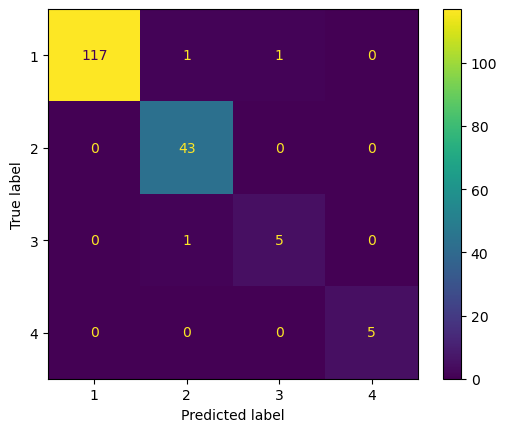

In [51]:
# Your code to display confusion matrix between predicted output and actual output

cm = confusion_matrix(y_test, y_pred) 
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = clf_gini.classes_)
disp.plot()
plt.show()

In [52]:
# add accuracy value for DT based on Entropy

test_scores_DT_models.append(accuracy[1])
test_scores_DT_models

[0.9826589595375722, 0.9826589595375722]

In [53]:
# add model to the list
DT_models.append('DT_Gini')
DT_models

['DT_Entropy', 'DT_Gini']

In [54]:
tree.export_graphviz(clf_gini, out_file='tree_grid_clf_gini.dot', 
                feature_names=feature_name,  # replace index numbers with their names in the figure
                #class_names= [target_name],
                filled=True )  # color the vertices of the graph 

In [55]:
display(Image('tree_grid_clf_gini.png', unconfined=True))

FileNotFoundError: No such file or directory: 'tree_grid_clf_gini.png'

FileNotFoundError: No such file or directory: 'tree_grid_clf_gini.png'

<IPython.core.display.Image object>

In [56]:
clf_loss = DecisionTreeClassifier(criterion='log_loss')

In [57]:
clf_loss = clf_loss.fit(X_train, y_train)

In [58]:
y_pred = clf_loss.predict(X_test)

test_score = accuracy_score(y_test, y_pred)
    
accuracy.append(test_score)
    

print("Accuracy test set: ", accuracy_score(y_test, y_pred))

print("Precision test set: ", precision_score(y_test, y_pred, average = 'weighted' )) 
print("Recall test set: ", recall_score(y_test, y_pred, average = 'weighted' ))
print("F-score test set: ", f1_score(y_test, y_pred, average = 'weighted' ))


print(classification_report(y_test, y_pred))

Accuracy test set:  0.9826589595375722
Precision test set:  0.9831727681438664
Recall test set:  0.9826589595375722
F-score test set:  0.9827413450662201
              precision    recall  f1-score   support

           1       1.00      0.98      0.99       119
           2       0.96      1.00      0.98        43
           3       0.83      0.83      0.83         6
           4       1.00      1.00      1.00         5

    accuracy                           0.98       173
   macro avg       0.95      0.95      0.95       173
weighted avg       0.98      0.98      0.98       173



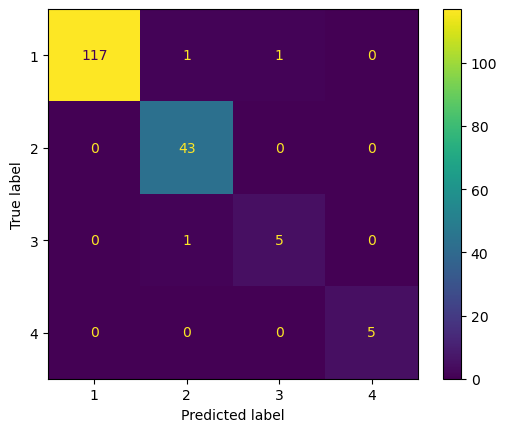

In [59]:
cm = confusion_matrix(y_test, y_pred) 
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = clf_entropy.classes_)
disp.plot()
plt.show()

In [60]:
# add accuracy value for DT based on Entropy

test_scores_DT_models.append(accuracy[2])
test_scores_DT_models

[0.9826589595375722, 0.9826589595375722, 0.9826589595375722]

In [61]:
# add model to the list
DT_models.append('DT_Loss')
DT_models

['DT_Entropy', 'DT_Gini', 'DT_Loss']

In [62]:
tree.export_graphviz(clf_loss, out_file='tree_grid_clf_loss.dot', 
                feature_names=feature_name,  # replace index numbers with their names in the figure
                #class_names= [target_name],
                filled=True )  # color the vertices of the graph

In [63]:
# View the tree image

display(Image('tree_grid_clf_loss.png', unconfined=True))

FileNotFoundError: No such file or directory: 'tree_grid_clf_loss.png'

FileNotFoundError: No such file or directory: 'tree_grid_clf_loss.png'

<IPython.core.display.Image object>

In [64]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

In [65]:
# Create an empty list accuracy

accuracy = []

# Create an empty list train_scores_models
test_scores_models = []

# Create an empty list of models
models = []

In [66]:
# As an DT accuracy practically the same that take only one 

# add model to the list
models.append('Decision_Tree')
print(models, '\n')

# add accuracy value for DT
test_scores_models.append(test_scores_DT_models[0])
test_scores_models

['Decision_Tree'] 



[0.9826589595375722]

In [67]:
knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [68]:
# evaluate the classifer on test data
 
y_pred = knn.predict(X_test)

print("Accuracy test set: ", accuracy_score(y_test, y_pred))

print("Precision test set: ", precision_score(y_test, y_pred, average = 'weighted' )) 
print("Recall test set: ", recall_score(y_test, y_pred, average = 'weighted' ))
print("F-score test set: ", f1_score(y_test, y_pred, average = 'weighted' ))

print(classification_report(y_test, y_pred)) 

Accuracy test set:  0.9421965317919075
Precision test set:  0.9424671302465403
Recall test set:  0.9421965317919075
F-score test set:  0.9404474756433654
              precision    recall  f1-score   support

           1       0.95      0.99      0.97       119
           2       0.90      0.86      0.88        43
           3       1.00      0.67      0.80         6
           4       1.00      0.80      0.89         5

    accuracy                           0.94       173
   macro avg       0.96      0.83      0.89       173
weighted avg       0.94      0.94      0.94       173



In [69]:
# add model to the list

models.append('k-NN')
print(models, '\n')

# add accuracy value for k-NN

test_scores_models.append(accuracy_score(y_test, y_pred))
test_scores_models


['Decision_Tree', 'k-NN'] 



[0.9826589595375722, 0.9421965317919075]

In [70]:
logisticRegression =  LogisticRegression(random_state = 0, max_iter=400)
logisticRegression.fit(X_train, y_train)

LogisticRegression(max_iter=400, random_state=0)

In [71]:
# evaluate the classifer on test data

y_pred = logisticRegression.predict(X_test)

print("Accuracy test set: ", accuracy_score(y_test, y_pred))

print("Precision test set: ", precision_score(y_test, y_pred, average = 'weighted' )) 
print("Recall test set: ", recall_score(y_test, y_pred, average = 'weighted' ))
print("F-score test set: ", f1_score(y_test, y_pred, average = 'weighted' ))

print(classification_report(y_test, y_pred)) 

Accuracy test set:  0.815028901734104
Precision test set:  0.8270509460381288
Recall test set:  0.815028901734104
F-score test set:  0.8201352276496786
              precision    recall  f1-score   support

           1       0.92      0.89      0.91       119
           2       0.67      0.67      0.67        43
           3       0.38      0.50      0.43         6
           4       0.43      0.60      0.50         5

    accuracy                           0.82       173
   macro avg       0.60      0.67      0.63       173
weighted avg       0.83      0.82      0.82       173



In [72]:
# add model to the list
models.append('logistic Regression')
print(models, '\n')

# add accuracy value for logistic Regression
test_scores_models.append(accuracy_score(y_test, y_pred))
test_scores_models


['Decision_Tree', 'k-NN', 'logistic Regression'] 



[0.9826589595375722, 0.9421965317919075, 0.815028901734104]

In [73]:
SVM = SVC(kernel = 'rbf')
SVM.fit(X_train, y_train)

SVC()

In [74]:
y_pred = SVM.predict(X_test)

print("Accuracy test set: ", accuracy_score(y_test, y_pred))

print("Precision test set: ", precision_score(y_test, y_pred, average = 'weighted' )) 
print("Recall test set: ", recall_score(y_test, y_pred, average = 'weighted' ))
print("F-score test set: ", f1_score(y_test, y_pred, average = 'weighted' ))

print(classification_report(y_test, y_pred))

Accuracy test set:  0.953757225433526
Precision test set:  0.9558216350123865
Recall test set:  0.953757225433526
F-score test set:  0.9514589305719434
              precision    recall  f1-score   support

           1       1.00      0.98      0.99       119
           2       0.86      0.98      0.91        43
           3       0.75      0.50      0.60         6
           4       1.00      0.60      0.75         5

    accuracy                           0.95       173
   macro avg       0.90      0.76      0.81       173
weighted avg       0.96      0.95      0.95       173



In [75]:
# add model to the list
models.append('SVM')
print(models, '\n')

# add accuracy value for SVM

test_scores_models.append(accuracy_score(y_test, y_pred))
test_scores_models

['Decision_Tree', 'k-NN', 'logistic Regression', 'SVM'] 



[0.9826589595375722, 0.9421965317919075, 0.815028901734104, 0.953757225433526]

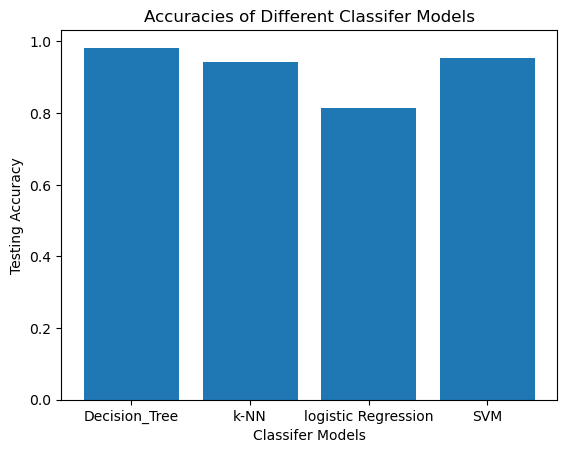

In [76]:
# Your code to plot and compare the performance of different algorithms

# Your code to plot accuracy vs kernels

plt.title('Accuracies of Different Сlassifer Models')    

plt.bar(models, test_scores_models)

plt.xlabel('Сlassifer Models')
plt.ylabel('Testing Accuracy')

plt.show()